# Text Cleaning


In [1]:
pip install pandas nltk


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Print column names to identify the correct column name
print("Columns in the dataset:", df.columns)

# Assuming the column name is different, you can find it here
# For example, if the column name is 'message', update the code accordingly
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(Content):
    # Lowercase the text
    Content = Content.lower()
    
    # Remove URLs and mentions
    Content = re.sub(r"http\S+|www\S+|https\S+|@\S+", '', Content, flags=re.MULTILINE)
    
    # Remove punctuation
    Content = Content.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    Content = re.sub(r'\d+', '', Content)
    
    # Tokenize the text
    tokens = word_tokenize(Content)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

# Update this line to use the correct column name
text_column_name = 'Content'  # Change this to the actual column name, e.g., 'message'
df['cleaned_text'] = df[text_column_name].apply(clean_text)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("Text cleaning completed and saved to 'cleaned_dataset.csv'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns in the dataset: Index(['Content', 'Label', 'Content_int'], dtype='object')
Text cleaning completed and saved to 'cleaned_dataset.csv'.


# Feature Extraction

In [1]:
pip install pandas matplotlib seaborn wordcloud nltk


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 544.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas scikit-learn


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
data = pd.read_csv('cleaned_dataset.csv')

# Ensure the dataset contains the required columns
assert 'cleaned_text' in data.columns, "The CSV file must contain a 'cleaned_text' column."
assert 'Label' in data.columns, "The CSV file must contain a 'Label' column."

# Check for missing values in the 'cleaned_text' column and handle them
data['cleaned_text'].fillna('', inplace=True)

# Extract texts and labels
texts = data['cleaned_text'].values
labels = data['Label'].values

# Vectorize the texts using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size
X = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Check the shape of the resulting vectors
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Now X_train and X_test are ready to be used for model training and evaluation


C:\Users\HP\AppData\Local\Temp\ipykernel_24920\3271289669.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_dataset.csv')


Shape of X_train: (352724, 1000)
Shape of X_test: (88182, 1000)


In [16]:
!pip install pandas scikit-learn nltk textblob spacy
!python -m spacy download en_core_web_sm


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 4.8 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.9 MB 3.0 MB/s eta 0:00:04
    --------------------------------------- 0.3/10.9 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.9 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.9 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.9 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.9 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.9 MB 2.6 MB/s eta 0:00:04
   --- --

C:\Users\HP\anaconda3\python.exe: No module named spacy


In [30]:
data.describe()

,Content,Label,Content_int,cleaned_text
count,440906,440906,440906,440906
unique,417561,5,417561,407716
top,content,0,"[146715, 7139, 146714]",
freq,7,207120,7,343


In [18]:
pip install textblob




  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)


In [20]:
pip install spacy



  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.12.3-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.4.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.18.1-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/12.1 MB 8.4 MB/s eta 0:00:02
   -- -------------------------------

In [23]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 2.3 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/12.8 MB 4.7 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/12.8 MB 4.8 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 4.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 3.9 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.2 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4.4 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 4.4 MB/s eta 0:00:03
     --------- ------------------------------ 3.0/12.8 MB 4.7 MB/s

C:\Users\HP\AppData\Local\Temp\ipykernel_28332\4178723814.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First few rows of the dataset:
                                             Content Label  \
0  denial of normal the con be asked to comment o...     1   
1  just by being able to tweet this insufferable ...     1   
2  that is retarded you too cute to be single tha...     1   
3  thought of a real badass mongol style declarat...     1   
4                                afro american basho     1   

                                         Content_int  \
0  [146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...   
1  [146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...   
2  [146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...   
3  [146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...   
4                       [146715, 46, 47, 48, 146714]   

                                        cleaned_text  
0  denial normal con asked comment tragedy emotio...  
1  able tweet insufferable bullshit prof trump na...  
2                          retarded cute single life  
3  thought real badass mongol style dec

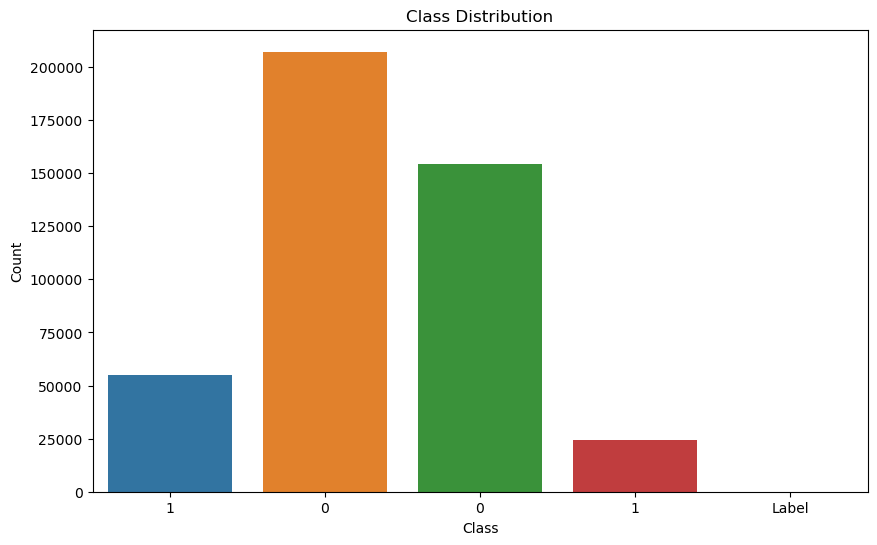

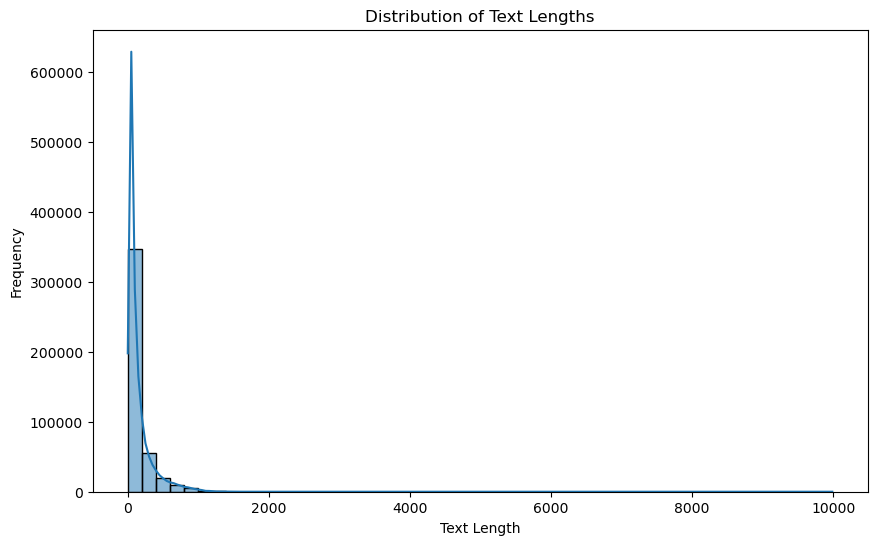

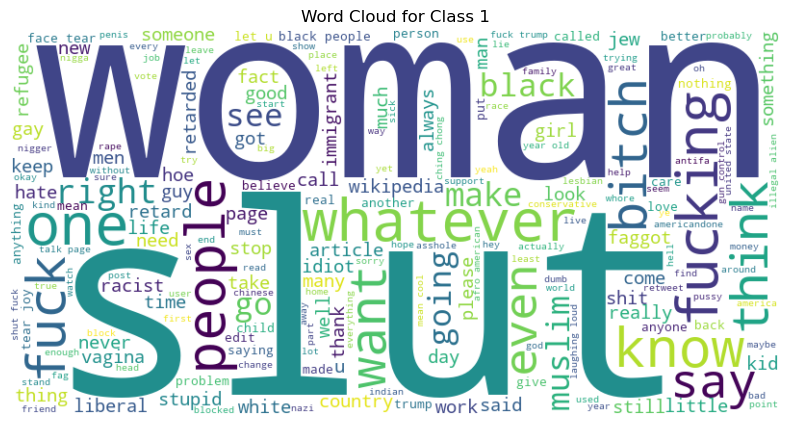

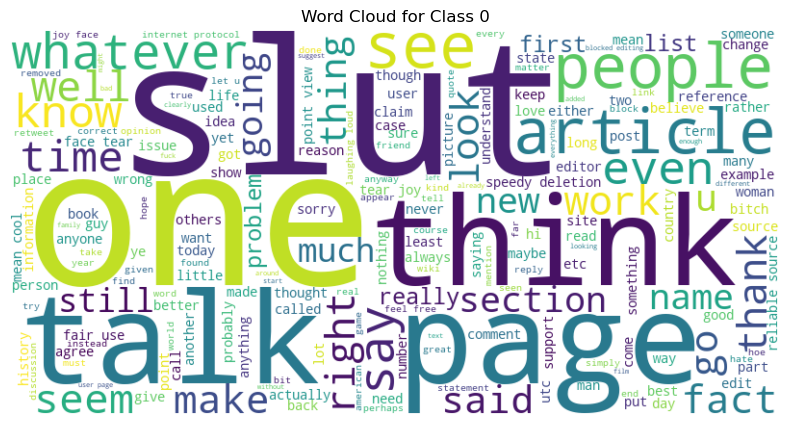

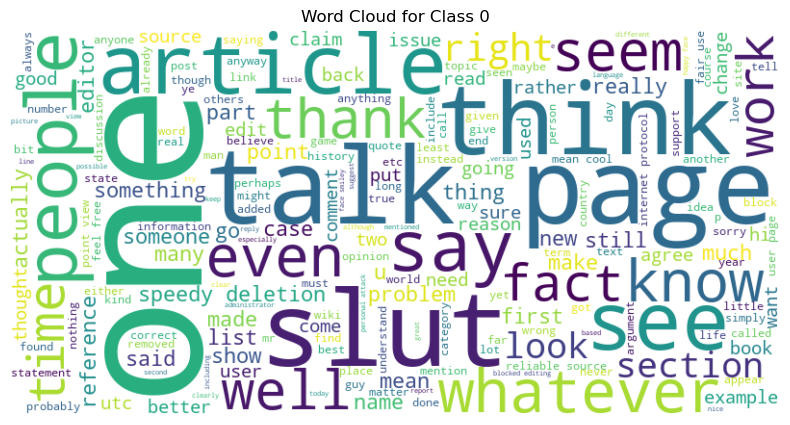

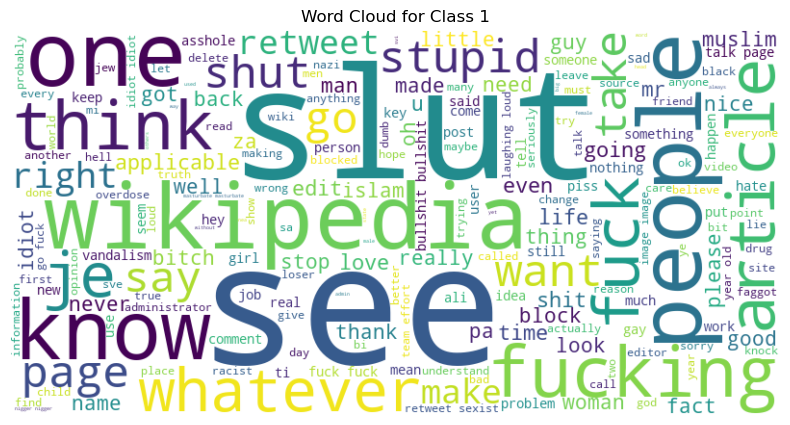

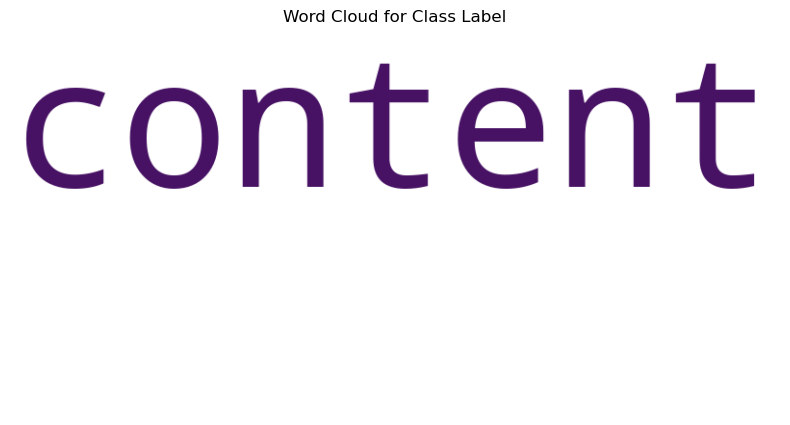

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
file_path = 'cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Visualize the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of text lengths
df['cleaned_text_length'] = df['cleaned_text'].apply(lambda x: len(str(x)))  # Ensure text length is calculated correctly
plt.figure(figsize=(10, 6))
sns.histplot(df['cleaned_text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap (if there are numeric features)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_features) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numeric_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

# Ensure no NaN values in 'cleaned_text' column for word cloud generation
df['cleaned_text'].fillna('', inplace=True)

# Word cloud of the text data for each class (if text data is present)
for label in df['Label'].unique():
    text_data = ' '.join(df[df['Label'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {label}')
    plt.show()

# Pairplot to identify trends and correlations between features (if numeric features exist)
if len(numeric_features) > 1:
    sns.pairplot(df, hue='Label', vars=numeric_features)
    plt.show()


# Model Selection and Training

In [2]:
# Install necessary packages
!pip install pandas scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data = pd.read_csv('cleaned_dataset.csv')

# Ensure the dataset contains the required columns
assert 'cleaned_text' in data.columns, "The CSV file must contain a 'cleaned_text' column."
assert 'Label' in data.columns, "The CSV file must contain a 'Label' column."

# Extract texts and labels
texts = data['cleaned_text'].values
labels = data['Label'].values

# Vectorize the texts using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', pos_label='hate')
    recall = recall_score(y_test, y_pred, average='binary', pos_label='hate')
    f1 = f1_score(y_test, y_pred, average='binary', pos_label='hate')
    return accuracy, precision, recall, f1

# Evaluate each model
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    print(f"{model_name}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n")

# Visualize model performance
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

# Print classification report and confusion matrix for the best model (example with Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 991.0 kB/s eta 0:00:01
     --------------------- ----------------- 92.2/165.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------- ----- 143.4/165.5 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 995.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 4.3 MB/s eta 0:00:02
   - -------------------------------------- 0.2/8.0 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.0 MB 2.6 MB/s eta 0:00:03
   - -------------------------------------- 0.4/8.0 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.0 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/8.0 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.0 MB 2.3 MB/s eta 0:00:04
   ---

C:\Users\HP\AppData\Local\Temp\ipykernel_28332\3162517765.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_dataset.csv')


ValueError: np.nan is an invalid document, expected byte or unicode string.